<a href="https://colab.research.google.com/github/IsraelAbebe/Personal-Projects-and-Exercises/blob/master/Paper-Play/vae-experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [0]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [0]:
grayscale_train_images = []
for i in train_images:
    img = i.copy()
    x = np.dot(i[...,:3], [0.299, 0.587, 0.114])
    img[:,:,0] = x
    img[:,:,1] = x
    img[:,:,2] = x
    
    grayscale_train_images.append(img)


grayscale_test_images = []
for i in test_images:
    img = i.copy()
    x = np.dot(i[...,:3], [0.299, 0.587, 0.114])
    img[:,:,0] = x
    img[:,:,1] = x
    img[:,:,2] = x
    
    grayscale_test_images.append(img)


In [11]:
grayscale_train_images = np.array(grayscale_train_images)
grayscale_train_images.shape

grayscale_test_images = np.array(grayscale_test_images)
grayscale_test_images.shape

(10000, 32, 32, 3)

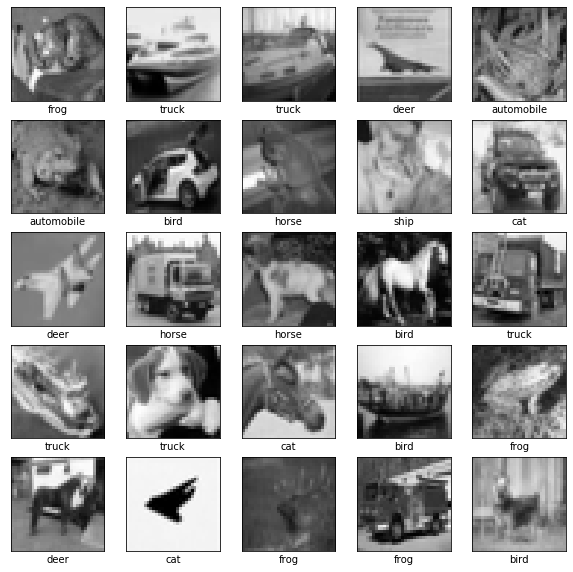

In [13]:
class_names = ['airoplane','automobile','bird','cat',
               'deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(grayscale_test_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [70]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dense(6*6*32))
model.add(layers.Activation('relu'))
model.add(layers.Reshape((6,6,32)))

# model.add(layers.Conv2DTranspose(32,(3,3),activation='relu'))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2DTranspose(32,(3,3),activation='relu'))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2DTranspose(3,(3,3),activation='relu'))
model.add(layers.Conv2DTranspose(3,(3,3),activation='relu'))

model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)             

In [71]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(grayscale_train_images,train_images,batch_size=64,epochs=10,validation_data=(grayscale_test_images,test_images))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 109us/sample - loss: 660.0851 - accuracy: 0.3991 - val_loss: 475.0088 - val_accuracy: 0.4276
Epoch 2/10
50000/50000 [==============================] - 5s 92us/sample - loss: 462.6404 - accuracy: 0.4403 - val_loss: 400.2292 - val_accuracy: 0.4845
Epoch 3/10
50000/50000 [==============================] - 5s 95us/sample - loss: 397.5051 - accuracy: 0.4270 - val_loss: 400.2110 - val_accuracy: 0.4833
Epoch 4/10
50000/50000 [==============================] - 5s 95us/sample - loss: 397.4931 - accuracy: 0.4247 - val_loss: 400.2107 - val_accuracy: 0.3834
Epoch 5/10
50000/50000 [==============================] - 5s 92us/sample - loss: 397.4844 - accuracy: 0.4258 - val_loss: 400.1944 - val_accuracy: 0.4608
Epoch 6/10
50000/50000 [==============================] - 5s 92us/sample - loss: 397.4720 - accuracy: 0.4397 - val_loss: 400.1876 - val_accuracy: 0.4381
Epoch 7/10
50000/50000 [=======

In [0]:
import numpy as np
output = model.predict(np.expand_dims(grayscale_test_images[3], axis=0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


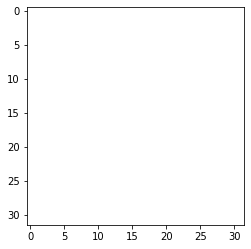

In [39]:
from PIL import Image
plt.imshow(output.reshape(32,32,3))

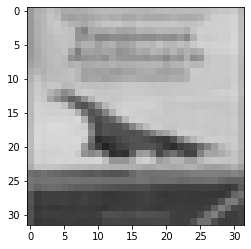

In [40]:
plt.imshow(grayscale_test_images[3])